# Exploratory Data Analysis - Senior Center Provider Data
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from senior_center_provider_data import scpd

In [2]:
scpd.columns

Index(['DFTA ID', 'Senior Center Name', 'Site Type', 'Borough',
       'Contract From Date', 'Contract To Date', 'Total FTEs', 'Total PTEs',
       'Months in HHS', 'Total Budget', 'Total Personnel Budget',
       'Total Expenses', 'Average Daily Clients', 'Kosher Meal Budget',
       'Non-Kosher Meal Budget', 'Total Meal Budget',
       'Average Meal Expenditure Per Client', 'Meal Prep Type',
       'Meal Prep For Other Centers', 'Total AIB-SCE-HPP Expenditures',
       'Average AIB-SCE-HPP Expenditures Per Client', 'Percent Utilization',
       'Latitude', 'Longitude', 'Total Employees', 'Client to Staff Ratio',
       'PTE Status', '% Budget Allocated for Personnel',
       '% Budget Allocated for Meals',
       '% Budget Used for AIB, SCE, & HPP Services'],
      dtype='object')

---
# Understanding the variables

## What are my grouping/categorical columns:
* `Site Type` (program site type: Neighborhood Senior Centers, Innovative Senior Centers, Senior Center)
* `Borough` (Brooklyn, Manhattan, Bronx, Queens, Staten Island)
* `Meal Prep Type` (program prepares meal in-house: Meal Prep On-Site, Catered, Both, Not Applicable)
* `Meal Prep For Other Centers` (program prepares meals for other sites: No, Yes)
* `PTE Status` (part-time employees: No PTEs, Has PTEs)

In [3]:
# Get the sample size (n) for each grouping variable
for col in ['Site Type', 'Borough', 'Meal Prep Type', 'Meal Prep For Other Centers', 'PTE Status']:
    print(f'{scpd.value_counts(col)}\n')

Site Type
Neighborhood Senior Centers    271
Innovative Senior Centers       18
Senior Center                    5
dtype: int64

Borough
Brooklyn         97
Manhattan        73
Bronx            56
Queens           56
Staten Island    12
dtype: int64

Meal Prep Type
Meal Prep On-Site    149
Catered              101
Not Applicable        31
Both                  13
dtype: int64

Meal Prep For Other Centers
No     250
Yes     44
dtype: int64

PTE Status
Has PTEs       149
Has No PTEs    145
dtype: int64



---
# Generating a quick-and-dirty correlation matrix to see what numerical variables might be related

In [4]:
numeric_cols = ['Total Employees', 'Total FTEs', 'Total PTEs', 'Client to Staff Ratio', 'Total Budget', 'Total Personnel Budget', 'Total Meal Budget',
                '% Budget Allocated for Personnel', '% Budget Allocated for Meals', '% Budget Used for AIB, SCE, & HPP Services',
                'Average Daily Clients', 'Total Expenses', 'Total AIB-SCE-HPP Expenditures', 'Average Meal Expenditure Per Client',
                'Average AIB-SCE-HPP Expenditures Per Client']

# Compute a correlation matrix and assign to corr_matrix
corr_matrix = scpd[numeric_cols].corr('pearson')

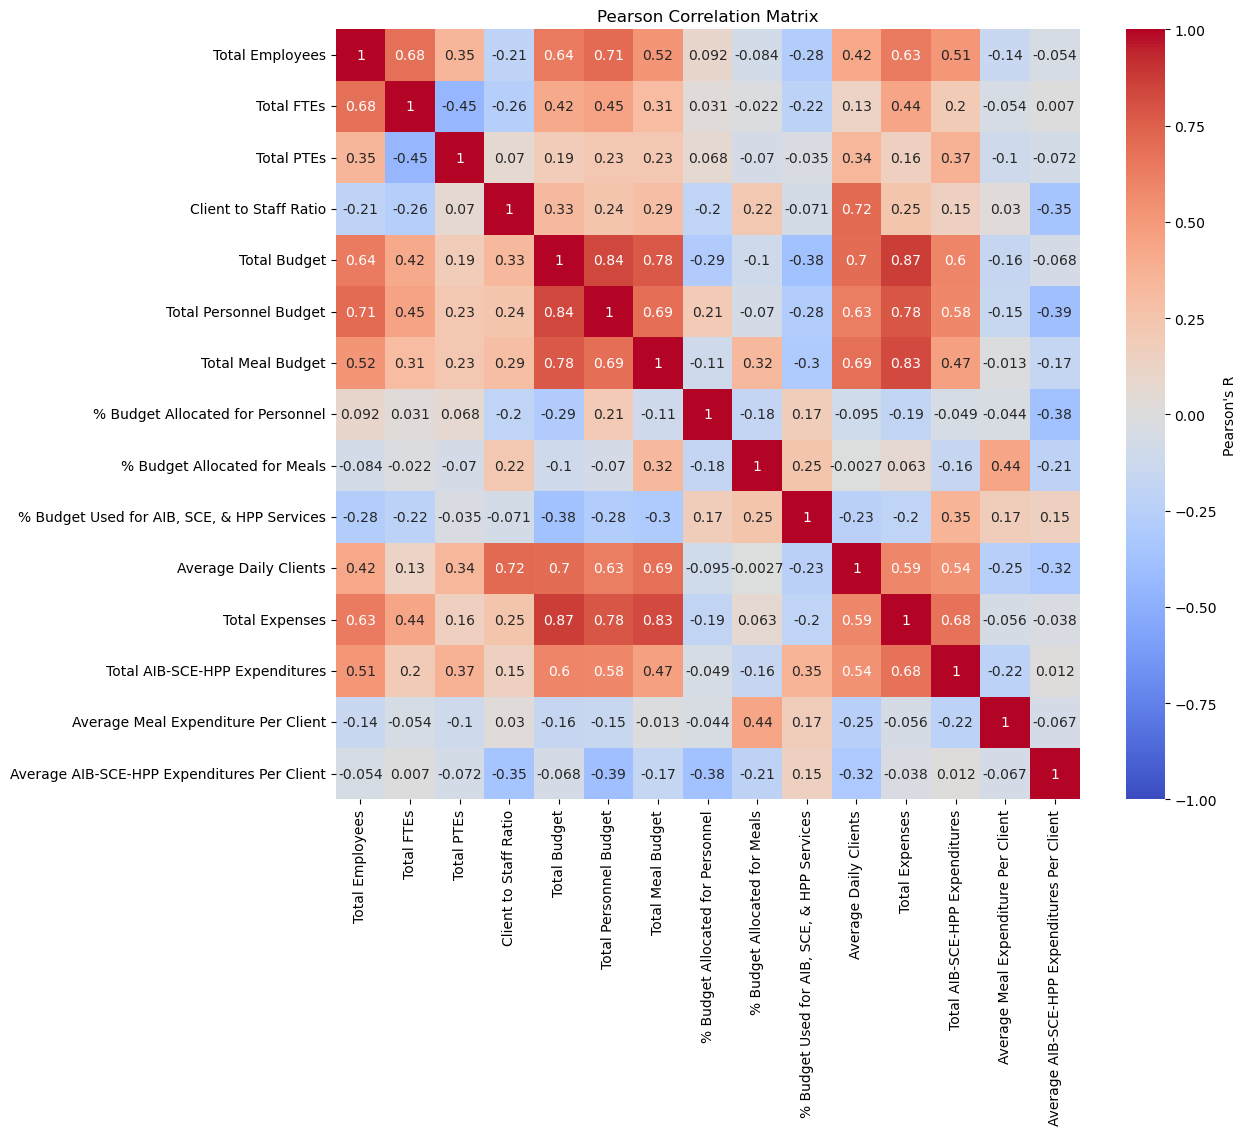

In [5]:
# Plot a heatmap from corr_matrix
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, vmin = -1.0, vmax = 1.0, annot = True, cmap = 'coolwarm',
            cbar_kws = {
                'label': 'Pearson\'s R',
                'orientation': 'vertical'
            }).set(title = 'Pearson Correlation Matrix')

plt.show()

## Potential relationships to explore
About total budget:
* `Total Budget` x `Total Employees` (r = 0.64)
* `Total Budget` x `Total Meal Budget` (r = 0.78)

About total personnel budget:
* `Total Personnel Budget` x `Total Budget` (r = 0.84)
* `Total Personnel Budget` x `Total Employees` (r = 0.71)
* `Total Personnel Budget` x `Total Meal Budget` (r = 0.69)

About average daily clients:
* `Average Daily Clients` x `Total Employees` (r = 0.42)
* `Average Daily Clients` x `Total Budget` (r = 0.7)
* `Average Daily Clients` x `Total Personnel Budget` (r = 0.63)
* `Average Daily Clients` x `Total Meal Budget` (r = 0.69)
* `Average Daily Clients` x `Total Expenses` (r = 0.59)
* `Average Daily Clients` x `Client to Staff Ratio` (r = 0.72)

About total expenses:
* `Total Expenses` x `Total Employees` (r = 0.63)
* `Total Expenses` x `Total Budget` (r = 0.87)
* `Total Expenses` x `Total Personnel Budget` (r = 0.78)
* `Total Expenses` x `Total Meal Budget` (r = 0.83)
* `Total Expenses` x `Total AIB-SCE-HPP Expenditures` (r = 0.68)

About meals:
* `Average Meal Expenditure Per Client` x `% Budget Allocated for Meals` (r = 0.44)

---
# Grouping by Borough

## How many senior centers partnered with NYC Aging are in each borough?

In [6]:
print(f"The number of senior centers in each borough is:\n{scpd.value_counts('Borough')}")

The number of senior centers in each borough is:
Borough
Brooklyn         97
Manhattan        73
Bronx            56
Queens           56
Staten Island    12
dtype: int64


## What is the average number of employees (FTEs + PTEs) per senior center for each borough?

In [7]:
scpd.groupby('Borough')['Total Employees'].describe()[['mean', 'std']]

,mean,std
Borough,,
Bronx,8.178571,3.247976
Brooklyn,9.030928,4.590419
Manhattan,10.000000,4.493823
Queens,10.660714,5.254528
Staten Island,12.833333,5.024184


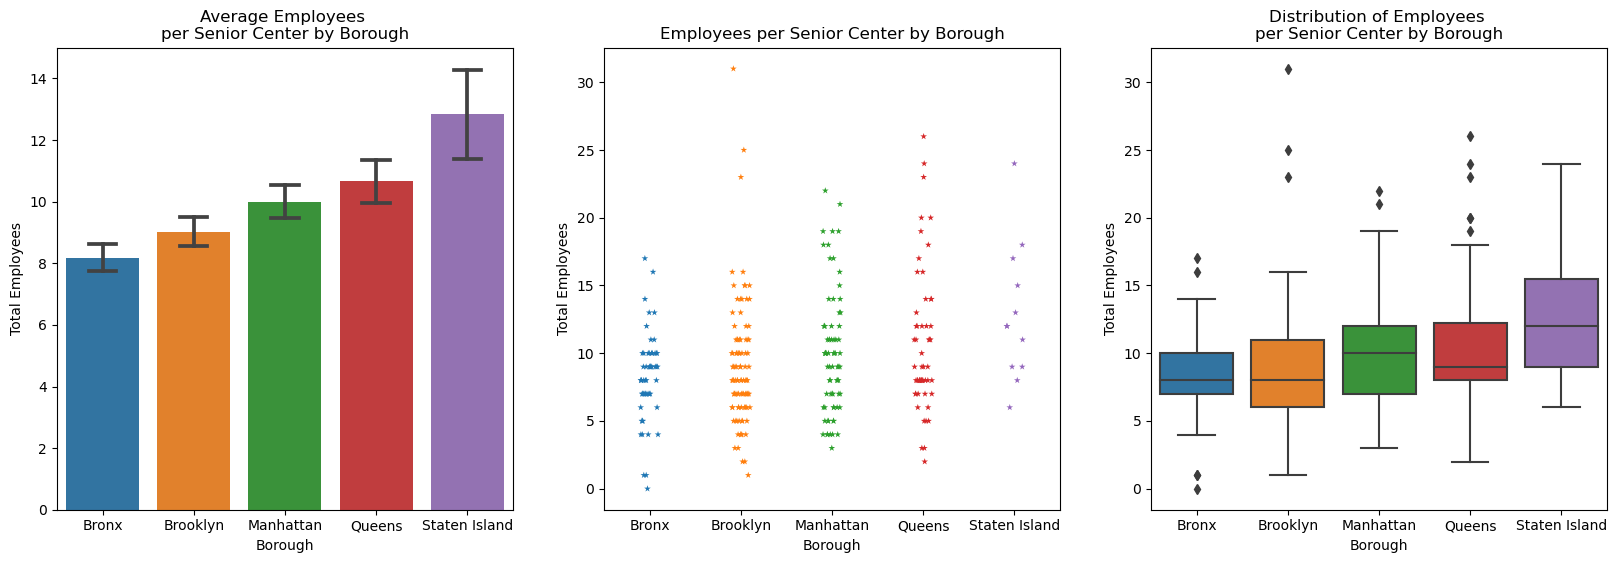

In [8]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.barplot(scpd, x = 'Borough', y = 'Total Employees', errorbar = 'se', capsize = .3).set(title = 'Average Employees \nper Senior Center by Borough')

plt.subplot(1, 3, 2)
sns.stripplot(scpd, x = 'Borough', y = 'Total Employees', hue = 'Borough', marker = '*', jitter = True, legend = False).set(title = 'Employees per Senior Center by Borough')

plt.subplot(1, 3, 3)
sns.boxplot(scpd, x = 'Borough', y = 'Total Employees').set(title = 'Distribution of Employees \nper Senior Center by Borough')

plt.show()

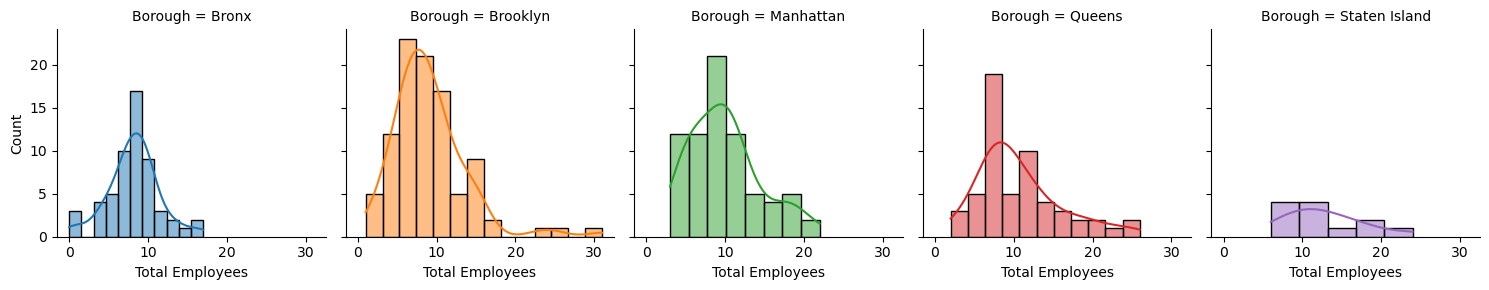

In [9]:
boroughs_facetgrid = sns.FacetGrid(scpd, col = 'Borough', hue = 'Borough')
boroughs_facetgrid.map(sns.histplot, 'Total Employees', kde = True)
plt.show()

## How many senior centers have part-time employees (PTEs) in each borough?

In [10]:
print(f"For each borough, the number of senior centers having vs. not having PTEs is: \n\n{scpd.groupby(['Borough', 'PTE Status'])['Total PTEs'].count()}")

For each borough, the number of senior centers having vs. not having PTEs is: 

Borough        PTE Status 
Bronx          Has No PTEs    33
               Has PTEs       23
Brooklyn       Has No PTEs    54
               Has PTEs       43
Manhattan      Has No PTEs    26
               Has PTEs       47
Queens         Has No PTEs    30
               Has PTEs       26
Staten Island  Has No PTEs     2
               Has PTEs       10
Name: Total PTEs, dtype: int64


## What is the average number of full-time employees vs. part-time employees for each borough?

In [11]:
print('Average Full-Time Employees by Borough')
avg_ftes = scpd.groupby('Borough')['Total FTEs'].describe()[['mean', 'std']]
avg_ftes

Average Full-Time Employees by Borough


,mean,std
Borough,,
Bronx,5.946429,3.839601
Brooklyn,7.134021,4.738207
Manhattan,6.095890,4.705683
Queens,8.071429,5.761493
Staten Island,7.166667,4.745013


In [12]:
print('Average Part-Time Employees by Borough')
avg_ptes = scpd.groupby('Borough')['Total PTEs'].describe()[['mean', 'std']]
avg_ptes

Average Part-Time Employees by Borough


,mean,std
Borough,,
Bronx,2.232143,3.516150
Brooklyn,1.896907,2.855859
Manhattan,3.904110,4.435226
Queens,2.589286,3.711294
Staten Island,5.666667,4.478907


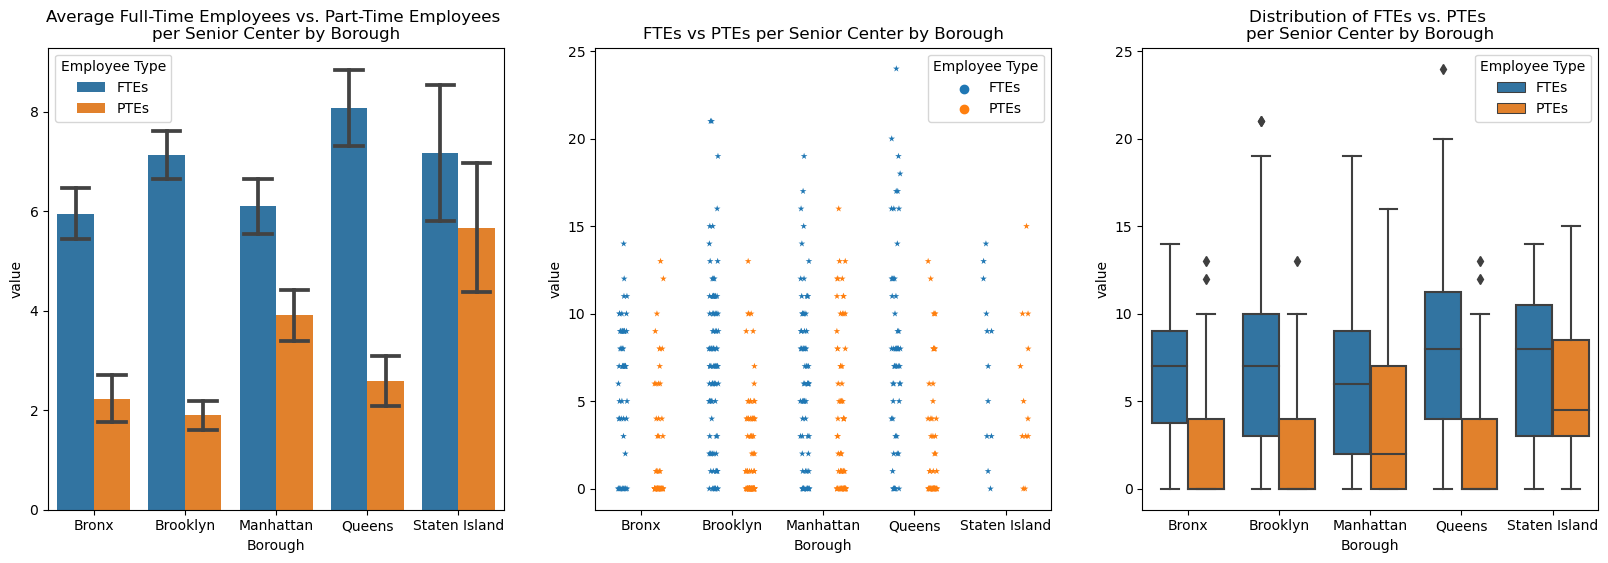

In [13]:
# Declare melted_df dataframe that reshapes data so 'Total FTEs' and 'Total PTEs' are combined into a single 'value' column
melted_df = scpd.melt(id_vars = 'Borough', value_vars = ['Total FTEs', 'Total PTEs'], var_name = 'Employee Type')
melted_df['Employee Type'] = melted_df['Employee Type'].replace({'Total FTEs': 'FTEs', 'Total PTEs': 'PTEs'})

# Create figure
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.barplot(melted_df, x = 'Borough', y = 'value', hue = 'Employee Type', errorbar = 'se', capsize = 0.3).set(title = 'Average Full-Time Employees vs. Part-Time Employees \nper Senior Center by Borough')

plt.subplot(1, 3, 2)
sns.stripplot(melted_df, x = 'Borough', y = 'value', hue = 'Employee Type', marker = '*', jitter = True, dodge = True).set(title = 'FTEs vs PTEs per Senior Center by Borough')

plt.subplot(1, 3, 3)
sns.boxplot(melted_df, x = 'Borough', y = 'value', hue = 'Employee Type').set(title = 'Distribution of FTEs vs. PTEs \nper Senior Center by Borough')
plt.show()

## What is the average percent budget allocated for personnel in each borough?

In [14]:
scpd.groupby('Borough')['% Budget Allocated for Personnel'].describe()[['count', 'mean', 'std']]

,count,mean,std
Borough,,,
Bronx,55.0,0.609888,0.127937
Brooklyn,93.0,0.590367,0.105637
Manhattan,65.0,0.636221,0.122903
Queens,52.0,0.553821,0.168380
Staten Island,11.0,0.667704,0.135904


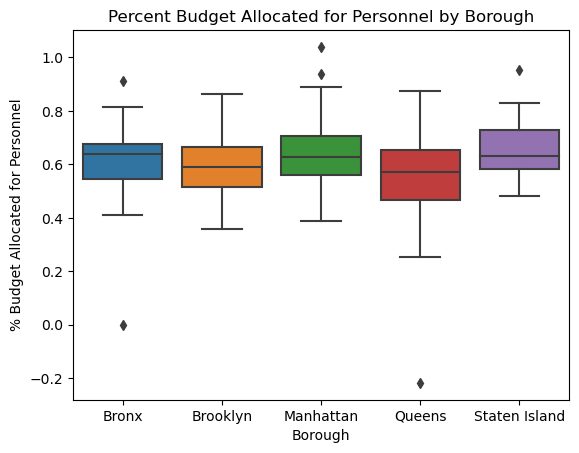

In [15]:
sns.boxplot(scpd, x = 'Borough', y = '% Budget Allocated for Personnel').set(title = 'Percent Budget Allocated for Personnel by Borough')
plt.show()

## Does the average percent budget allocated for personnel differ by PTE status?

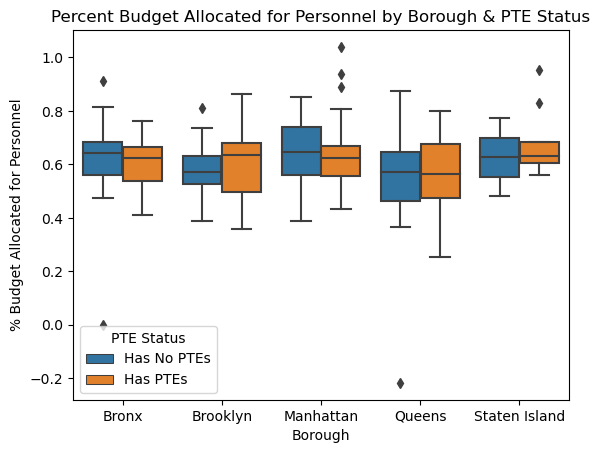

In [16]:
sns.boxplot(scpd, x = 'Borough', y = '% Budget Allocated for Personnel', hue = 'PTE Status').set(title = 'Percent Budget Allocated for Personnel by Borough & PTE Status')
plt.show()

## What is the average number of daily clients by borough?

In [17]:
scpd.groupby('Borough')['Average Daily Clients'].describe()[['count', 'mean', 'std']]

,count,mean,std
Borough,,,
Bronx,39.0,67.333333,26.229085
Brooklyn,59.0,78.118644,45.098010
Manhattan,44.0,98.727273,61.606162
Queens,29.0,101.862069,81.254329
Staten Island,3.0,69.333333,27.135463


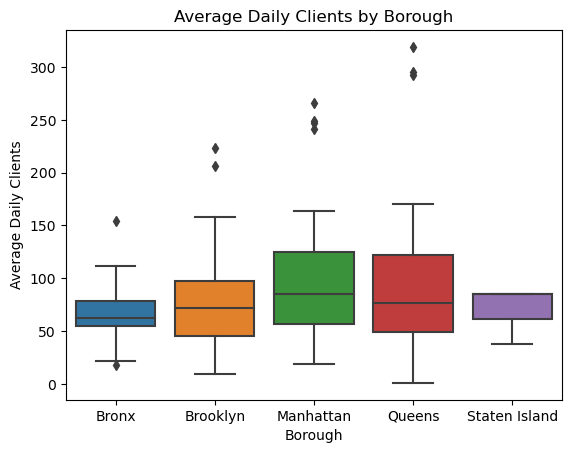

In [18]:
sns.boxplot(scpd, x = 'Borough', y = 'Average Daily Clients').set(title = 'Average Daily Clients by Borough')
plt.show()

## Is there a relationship between total number of employees and average daily clients (by borough)?

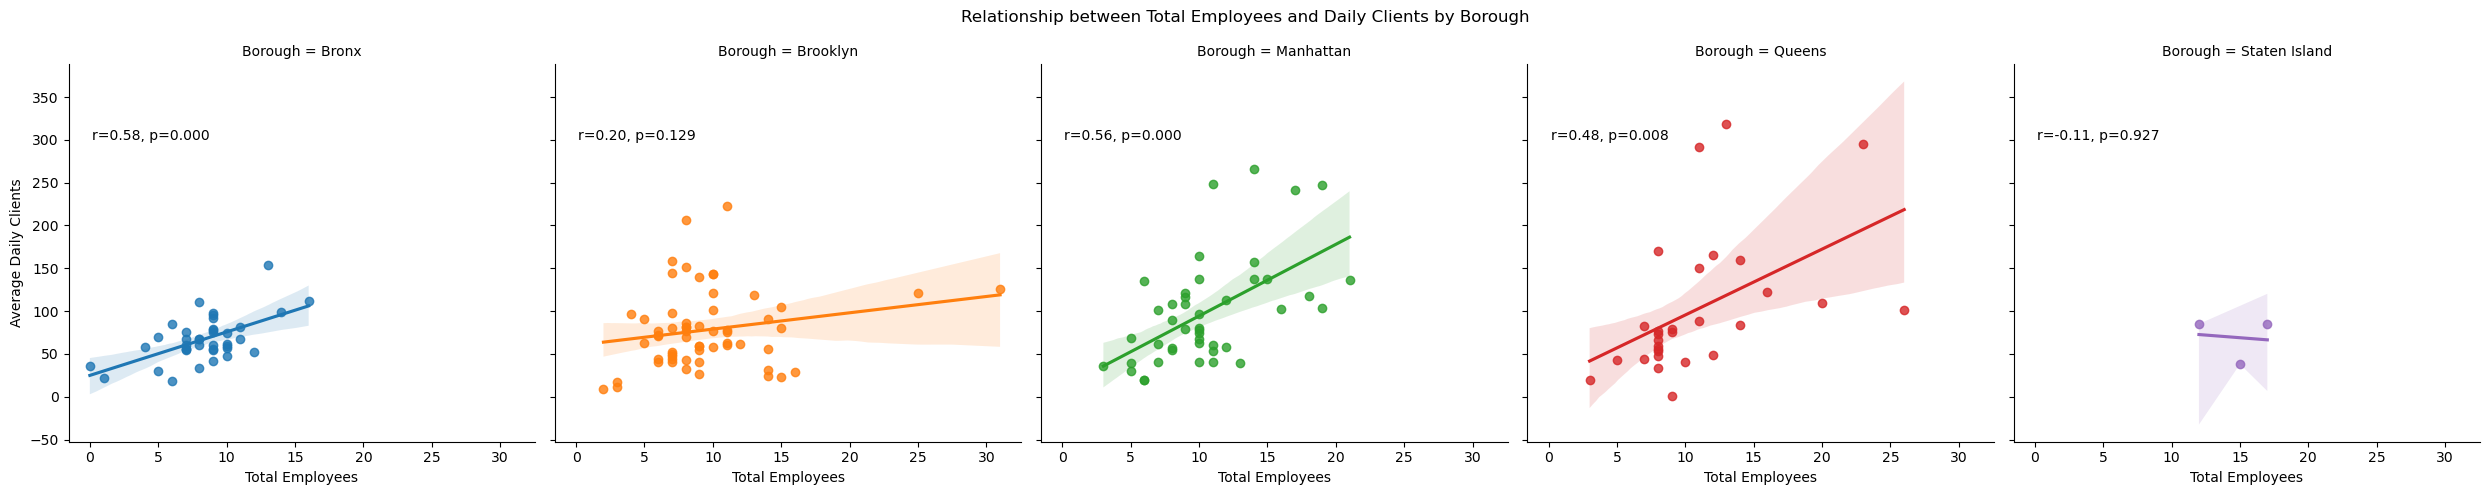

In [19]:
# Declare a FacetGrid boroughs_facetgrid containing plots of linear regressions by borough
boroughs_facetgrid = sns.lmplot(scpd, x = 'Total Employees', y = 'Average Daily Clients', col = 'Borough', hue = 'Borough')
boroughs_facetgrid.fig.suptitle("Relationship between Total Employees and Daily Clients by Borough")

# Define a function annotate that gets the current plot in the grid and annotates the pearson r and p-value onto the plot
def annotate(data, x, y, **kws):
    bool_mask = (data[x].notna()) & (data[y].notna())
    r, p = pearsonr(data.loc[bool_mask, x], data.loc[bool_mask, y])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.3f}'.format(r, p), transform = ax.transAxes)

# Plot the pearson-r values and p-values
boroughs_facetgrid.map_dataframe(annotate, x = 'Total Employees', y = 'Average Daily Clients')

plt.show()

## Is there a relationship between total number of employees and total budget for the year (by borough)?

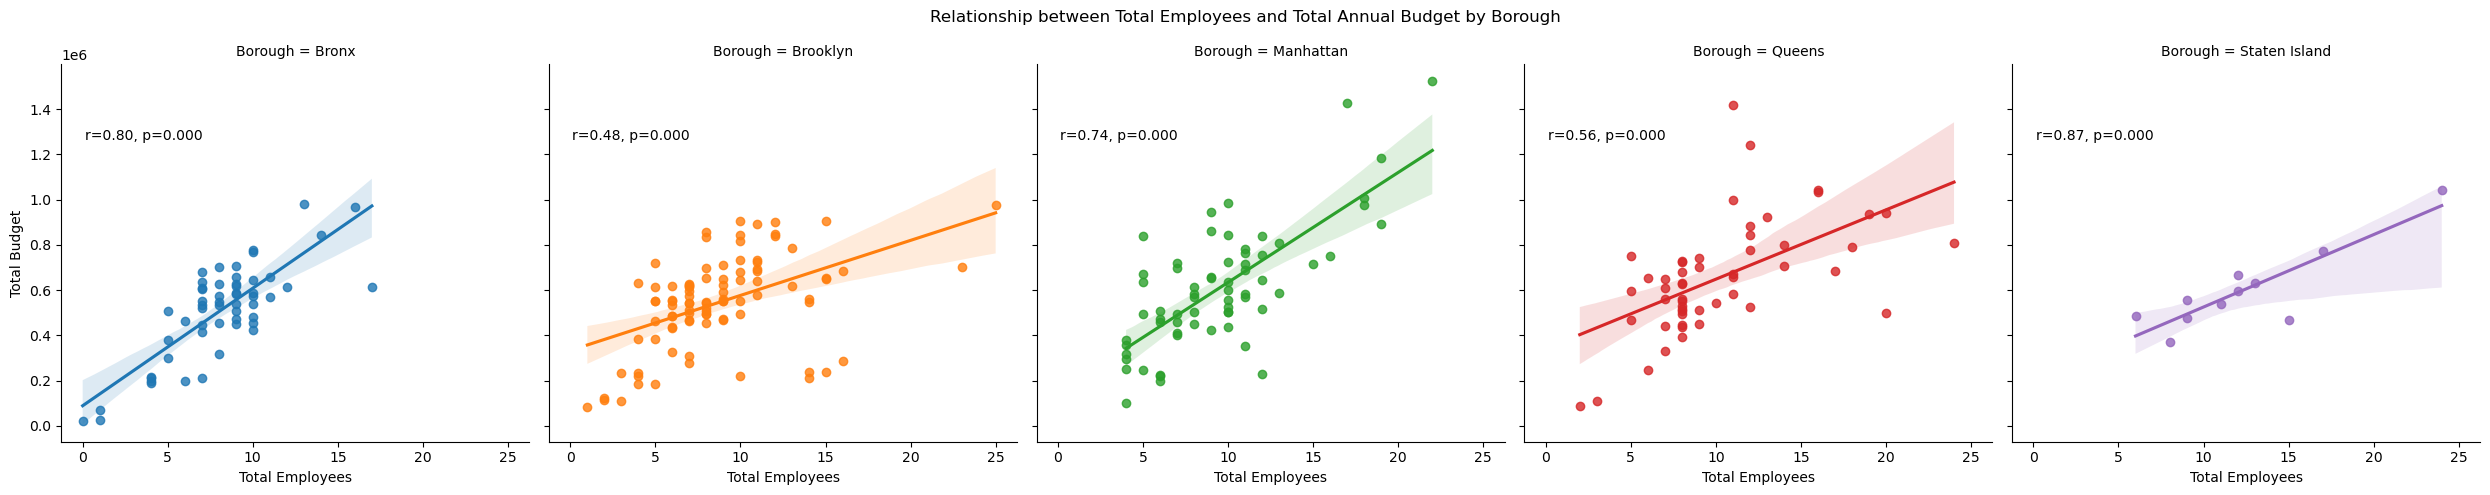

In [20]:
boroughs_facetgrid = sns.lmplot(scpd, x = 'Total Employees', y = 'Total Budget', col = 'Borough', hue = 'Borough')
boroughs_facetgrid.fig.suptitle("Relationship between Total Employees and Total Annual Budget by Borough")
boroughs_facetgrid.map_dataframe(annotate, x = 'Total Employees', y = 'Total Budget')

plt.show()

## Is there a relationship between total number of employees and total personnel budget (by borough)?

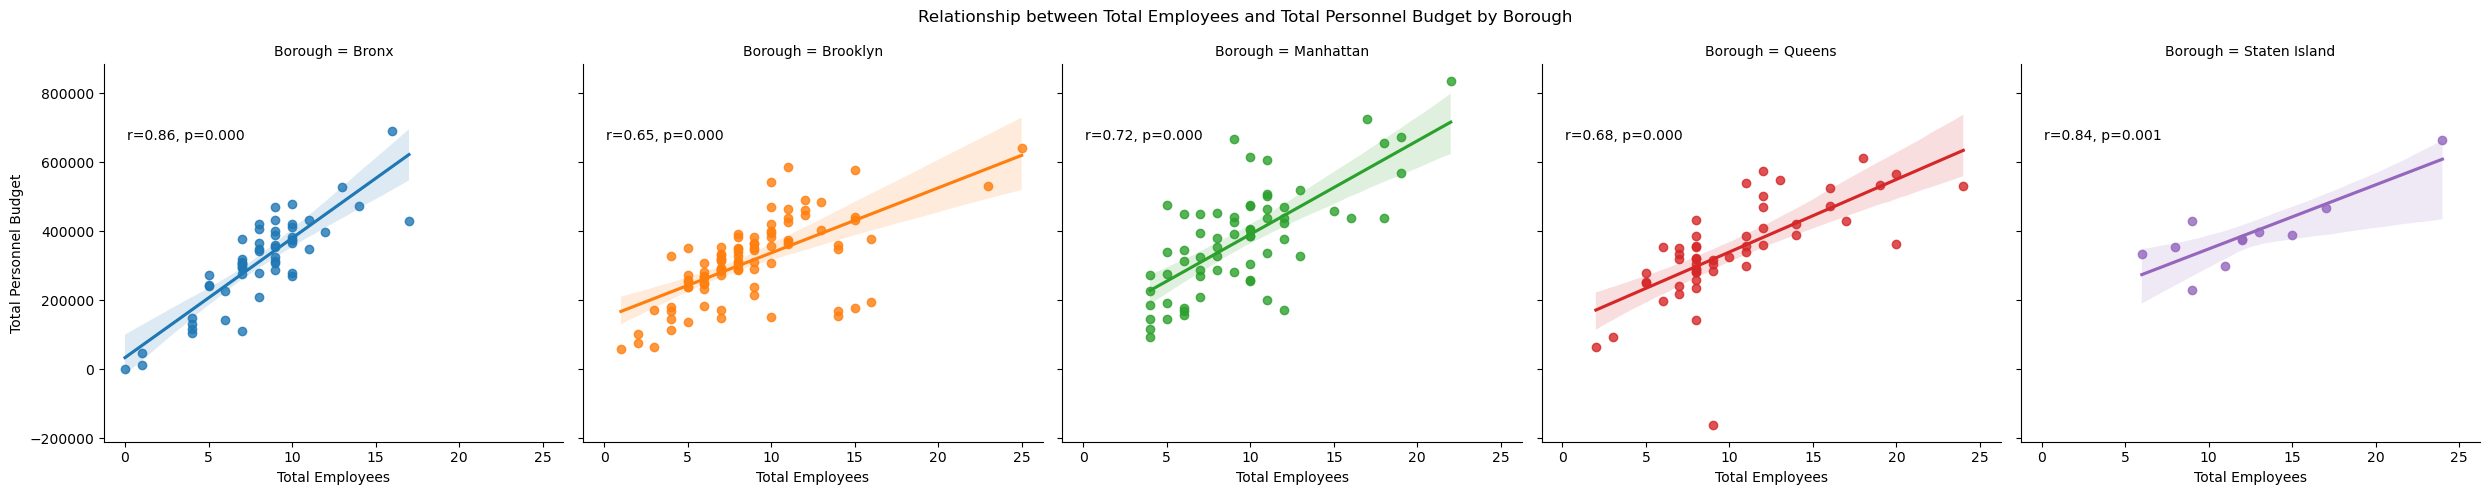

In [21]:
boroughs_facetgrid = sns.lmplot(scpd, x = 'Total Employees', y = 'Total Personnel Budget', col = 'Borough', hue = 'Borough')
boroughs_facetgrid.fig.suptitle("Relationship between Total Employees and Total Personnel Budget by Borough")
boroughs_facetgrid.map_dataframe(annotate, x = 'Total Employees', y = 'Total Personnel Budget')

plt.show()